# Hypothesis Testing
by Maxwell Margenot and Delaney Granizo-Mackenzie. Review by Gilbert Wasserman.

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)



Statistical inference, the practice of making predictions about a large group based on smaller samples, is traditionally broken into two segments, **estimation** and **hypothesis testing**. Estimation provides values for specific things that you may be interested in, such as mean or variance, with a provided confidence interval. A confidence interval provides a region within which you can expect to find the true value of the parameter you estimated, as an estimation will almost never be exact. Confidence intervals use a set confidence level to choose how wide the interval should be, to achieve a higher confidence, we must report a wider interval. For more information please see the [Confidence Intervals lecture](https://www.quantopian.com/lectures/confidence-intervals) from the Quantopian Lecture Series.

For example, we might estimate a sample mean as $100$, with a confidence interval of $90, 110$ at a $95\%$ confidence level. This doesn't mean that the true population mean is between $90$ and $110$ with $95\%$ probability, as the true mean is a fixed value and the probability is $100\%$ or $0\%$ but we don't know which one. Instead what this means is that over many computations of a $95\%$ confidence interval assuming underlying assumptions about distributions hold, the population mean will be in the interval $95\%$ of the time.

This gives us an idea of the specific characteristics that an overall population may exhibit, given a sample. Hypothesis testing provides a different focus, detailing a framework for statistical testing of hypothesized values. By making an assertion of what a value should be, you create a testable hypothesis.

One thing to keep in mind is that statistical tests are designed such that if all the pre-requisite conditions are true, you should get the right answer about the data a certain percentage of the time. When you accept a hypothesis as true based on a test, that doesn't mean it's definitely true. It just means that you can know the probability you are wrong.

##The Null and Alternative Hypothesis

The first thing we need to introduce is the null hypothesis, commonly written as $H_0$. The null hypothesis is the default case, generally reflecting the current common conception of the world. The alternative hypothesis is the one you are testing.

###Examples

The alternative hypothesis $H_A$ is that you own more than 10 pairs of shoes.
The null hypothesis $H_0$ is that you do not own more than 10 pairs of shoes.

The alternative hypothesis $H_A$ is that eating pizza is related with obesity.
The null hypothesis $H_0$ is that it is not.

The alternative hypothesis $H_A$ is that microsoft's mean returns > 0.
The null hypothesis $H_0$ is that they <= 0.

###Difficulty of Testing

Some hypotheses are easier to test than others. For instance the alternative hypothesis, "I own more than 10 pairs of shoes." and the accompanying null hypothesis that you do not, is easily tested by counting the number of pairs you own. However, you will still not get a perfect answer all the time in this case, as there may be measurement error in the counting, albiet quite small.

On the other hand, the hypothesis, "The number of insect species is greater than the number of stars in the universe." would be more difficult to test and require lots of data gathering.

###Hypotheses Must be Testable

A hypothesis cannot be vague, otherwise how will it be tested. For example, "Momentum trading is a good way to make money." is not really testable. What does 'good' mean? What type of momentum trading are we discussing? Hypotheses should be very specific and the type of test needed should follow quickly from the hypothesis.

## How to Perform Hypothesis Testing

The following are the main steps in hypothesis testing:

1. State the hypothesis and the alternative to the hypothesis
2. Identify the appropriate test statistic and its distribution. Ensure that any assumptions about the data are met (stationarity, normality, etc.)
3. Specify the significance level, $\alpha$
4. From $\alpha$ and the distribution compute the 'critical value'.
5. Collect the data and calculate the test statistic
6. Compare test statistic with critical value and decide whether to accept or reject the hypothesis.

First we state the hypothesis that we wish to test. We do this by identifying a **null hypothesis** and an **alternative hypothesis**. The null hypothesis, $H_0$, is the one that we want to test, while the alternative hypothesis, $H_A$, is the hypothesis that is accepted in the case where $H_0$ is rejected.

Let's say that we want to test whether the mean return of Microsoft stock is positive. The parameter that we are testing is denoted by $\theta$ and the proposed value of the parameter is denoted by $\theta_0$, which in this case is equal to $0$. So we say that our $H_0$ is $\theta = \theta_0$, that the returns are negative, and our $H_A$ is $\theta \neq \theta_0$. Including this formation, there are three possible ways to formulate null and alternative hypotheses:

1. $H_0: \theta = \theta_0$ versus $H_A: \theta \neq \theta_0$ (A "not equal to" alternative hypothesis)
2. $H_0: \theta \leq \theta_0$ versus $H_A: \theta > \theta_0$ (A "greater than" alternative hypothesis)
3. $H_0: \theta \geq \theta_0$ versus $H_A: \theta < \theta_0$ (A "less than" alternative hypothesis)

In this case, where we are testing the returns of MSFT, $\theta = \mu_{MSFT}$, representing the stock's mean returns. Since we are testing whether the returns are positive or negative, we have that $\theta_0 = 0$. Our example follows the first formulation of a hypothesis test. This is a **two-sided hypothesis test** (or **two-tailed hypothesis test**). The second and third formulations are examples of a **one-sided hypothesis test** (or **one-tailed hypothesis test**). With a one-sided test, we reject the null in favor of the alternative only if the data indivates that $\theta$ is repectively greater than or less than $\theta_0$. A two-sided test rejects the null in favor of the alternative if the data indicates that $\theta$ is either greater or less than $\theta_0$.

So if we were to write out our hypothesis for MSFT in more qualitative terms, we would have:

\begin{eqnarray}
H_0 &:& \text{The mean return on Microsoft stock is $0$}\\
H_A &:& \text{The mean return on Microsoft stock is not $0$}
\end{eqnarray}

When forming a hypothesis test, the null and alternative hypothesis must be complementary to each other. Between them they must cover all values of $\theta$. Regardless of the type of hypothesis test we are performing, we always test the null hypothesis as if $\theta = \theta_0$. In the case of either of the one-tailed tests, this will still provide more than enough evidence for us to make a decision. For example, if $H_0: \theta \leq 0$, $H_A: \theta > 0$, and we have enough evidence to reject $H_0: \theta = 0$ in favor of $H_A: \theta > 0$, then this holds true for all values less than $0$ as well.

The most common type of hypothesis test is the two-tailed, "not equal to", hypothesis test, because it presents a neutral view. The one-tailed hypothesis tests are less neutral than the "not equal to" test, reflecting the thoughts of the tester. One-tailed tests are often used to test "hoped for" results or results that the testers have a prior idea about.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
import yfinance as yf

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


Let's get some data.

[*********************100%%**********************]  1 of 1 completed


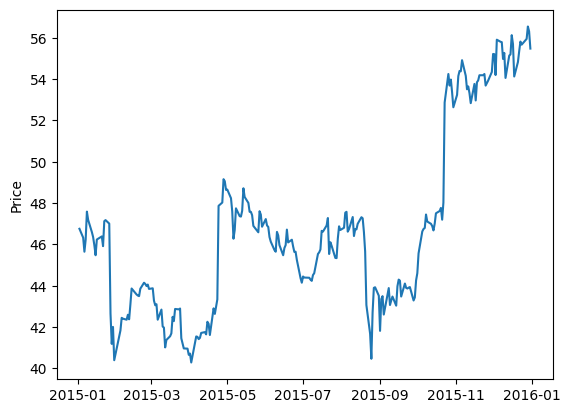

In [3]:
start = datetime(2015,1,1)
end = datetime(2016,1,1)
pricing_sample = yf.download("MSFT", start = start, end = end)['Close']

#transform it into returns
returns_sample = pricing_sample.pct_change()[1:]

# plot it
plt.plot(pricing_sample.index, pricing_sample.values)
plt.ylabel('Price');

Here are the returns.

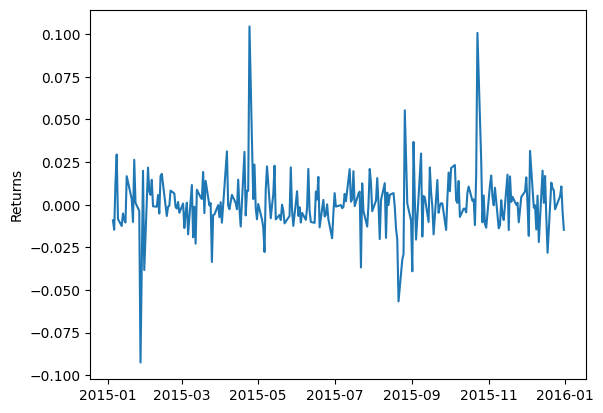

In [4]:
plt.plot(returns_sample.index, returns_sample.values)
plt.ylabel('Returns');

##Why is this all necessary?

Why can't we just take the mean returns of microsoft and check if they're > 0? Because we can't look at the actual data generating process behind the returns, we can only sample returns on some limited time period. Because we only observe a sample, that sample may or may not reflect the true state of the underlying process. Because of this uncertainty we need to use statistical tests.

Next, we identify the appropriate **test statistic** and its probability distribution. A test statistic usually takes the following form:

$$ \text{Test statistic} = \frac{\text{Sample statistic} - \text{Value of the population parameter under $H_0$ ($\theta_0$)}}{\text{Standard error of the sample statistic}} $$

A test statistic is calculated based on sample data and is compared to its probability distribution to determine whether to reject or not reject the null hypothesis. Since we are testing the mean return on MSFT stock, we can use the sample mean, $\bar{X}_\mu$, as our sample statistic. We calculate the standard error of the sample mean as $\sigma_{\bar{X}} = \frac{\sigma}{\sqrt{n}}$ if we know the standard deviation, $\sigma$, or as $s_{\bar{X}} = \frac{s}{\sqrt{n}}$, where $s$ is the sample standard deviation. So using these definitions, our test statistic can be calculated as:

$$ \frac{\bar{X}_\mu - \theta_0}{s_{\bar{X}}} = \frac{\bar{X}_\mu - 0}{s/\sqrt{n}} $$

The four most common distributions for test statistics are as follows:

* The $t$-distribution ($t$-test)
* The standard normal distribution ($z$-test)
* The chi-square ($\chi^2$) distribution ($\chi^2$-test)
* The $F$-distribution ($F$-test)

We will cover them in detail later. For now, we will say that we can use a $z$-test with our assumptions in the MSFT example.


After we identify the appropriate test statistic and probability distribution, we need to specify the **significance level** of the test, $\alpha$. The values that we compare our test statistic to in order to reject or fail to reject
the $H_0$ are determined based on our $\alpha$ value.

|| True Situation ||
| :---: | :---: | :---: |
| **Decision** | $H_0$ True | $H_0$ False |
| Do not reject $H_0$ | Correct Decision | Type II Error |
| Reject $H_0$ (accept $H_A$) | Type I Error | Correct Decision |

Our significance level is equal to the probability of a Type I error (a "false positive") occuring. The probability of a Type II error (a "false negative") occuring is denoted by $\beta$. If we try to decrease the probability of a Type I error occuring, we increase the probability of a Type II error occuring, resulting in a tradeoff. The only way to reduce the probability of both a Type I and a Type II error occuring is to increase the sample size.

The conventional significance levels are $0.1$, $0.05$, and $0.01$. Rejecting the null at $0.1$ mean that we have some evidence null is false, $0.05$ means we have strong evidence null is false, rejecting at $0.01$ we have very strong evidence that null is false.

### Critical Value

Now we figure out our critical value, or, rejection point. The critical value for our test statistic is the value that we compare the test statistic to when deciding whether to reject the null hypothesis. If we reject the null, we say that the result is **statistically significant**, while if we fail to reject the null, we say that the result is **not statistically significant**.

We compare our test statistic to a **critical value** in order to decide whether to reject or not reject the null hypothesis. The critical value of a test is determined based on the $\alpha$ of our hypothesis test as well as the chosen distribution. In our case, say that $\alpha = 0.05$, so our significance level is $0.05$. With a one-sided $z$-test, there are two different ways to see the critical values:

* If we test $H_0$: $\theta \leq \theta_0$, $H_A$: $\theta > \theta_0$ at $\alpha = 0.05$, our critical value is $z_{0.05} = 1.645$. So we compare our test statistic and we reject the null hypothesis if $z > 1.645$.
* If we test $H_0$: $\theta \geq \theta_0$, $H_A$: $\theta < \theta_0$ at $\alpha = 0.05$, our critical value is $-z_{0.05} = -1.645$. As such, we compare our test statistic and we reject the null hypothesis if $z < -1.645$.

A two-sided test is a slightly different situation. Since it is two-sided, there are two rejection points, negative and positive. Our $\alpha$ is $0.05$, so the total probability of a Type I error must sum to $0.05$. As such, we split $0.05$ in half so that our two rejection points are $z_{0.025}$ and $-z_{0.025}$ for the positive and negative critical values, respectively. For a $z$-test, these values are $1.96$ and $-1.96$. Thus, we reject the null if $z < -1.96$ or if $z > 1.96$. If we find that $-1.96 \leq z \leq 1.96$, we fail to reject the null.

When conducting a hypothesis test, you can also use a **$p$-value** to determine the result. A $p$-value is the minimum level of significance where you can reject the null hypothesis. Often people will interpret $p$-values as the "probability that the null hypothesis is false", but this is misleading. A $p$-value only makes sense when compared to the significance value. If a $p$-value is less than $\alpha$, we reject the null and otherwise we do not. Lower $p$-values do not make something "more statistically significant". A lot of statistical outputs will calculate a $p$-value for you, but it is also possible to calculate it manually. The calculation depends both on your type of hypothesis test and the CDF (covered in the [random variables lecture](https://www.quantopian.com/lectures/random-variables)) of the distribution you are working with. To manually calculate a $p$-value, do the following:

* In a 'less than or equal to' hypothesis test, the $p$-value is $1 - CDF(\text{Test Statistic})$
* In a 'greater than or equal to' hypothesis test, the $p$-value is $CDF(\text{Test Statistic})$
* In a 'not equal to' hypothesis test, the $p$-value is $2 * 1 - CDF(|\text{Test Statistic}|)$

Significance values tie very nicely into confidence intervals, which are covered more in-depth in our [confidence intervals lecture](https://www.quantopian.com/lectures/confidence-intervals). A confidence interval provides us with an estimate for a parameter's possible range in values given a certain significance level. For example, if our $99\%$ confidence interval for the mean of MSFT returns was $(-0.0020, 0.0023)$, that would mean that there was a $99\%$ chance that the true value of the mean was within that interval.

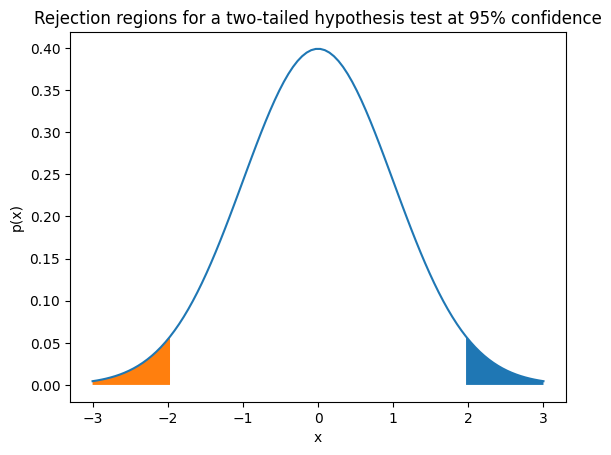

In [5]:
# Plot a standard normal distribution and mark the critical regions with shading
x = np.linspace(-3, 3, 100)
norm_pdf = lambda x: (1/np.sqrt(2 * np.pi)) * np.exp(-x * x / 2)
y = norm_pdf(x)

fig, ax = plt.subplots(1, 1, sharex=True)
ax.plot(x, y)
ax.fill_between(x, 0, y, where = x > 1.96)
ax.fill_between(x, 0, y, where = x < -1.96)
plt.title('Rejection regions for a two-tailed hypothesis test at 95% confidence')
plt.xlabel('x')
plt.ylabel('p(x)');

Now we collect the relevant data for our test and calculate the test statistic for a two sided, $5\%$ significance test. Keep in mind that any negative characteristics of the data will negatively affect our hypothesis test and possibly render it invalid. In the case of our test of MSFT returns, we may run into issues of time-period bias, or of look-ahead bias (if we prepare the test incorrectly). As always with historical data, the data that we work with may result in a specific test result that may not hold for the future. We also have to make sure that the data does not include any values that we would not have known during the time period we are testing (though this is more of an issue when comparing multiple things with hypothesis tests).

Here we calculate the test statistic:

In [6]:
n = len(returns_sample)
test_statistic = ((returns_sample.mean() - 0) /
                (returns_sample.std()/np.sqrt(n)))
print('t test statistic: ', test_statistic)

t test statistic:  0.7449531394807984


In order to make the statistical decision for the test, we compare our test statistic to our critical value. Our test statistic as stated above is between the two critical values for a 95% two-tailed $z$-test so in this example we **fail to reject** our $H_0$, our hypothesis that MSFT returns are **not** $0$.

If we chose instead to determine the result of this hypothesis test with a $p$-value, we would calculate the $p$-value in the following way:

In [8]:
from scipy.stats import t

In [9]:
p_val = 2 * (1 - t.cdf(test_statistic, n - 1))
print('P-value is: ', p_val)

P-value is:  0.4569997843724236


Because the $p$-value is greater than our significance level, $\alpha = 0.05$, we **fail to reject** the null hypothesis.

After we make the statistical decision, we have to translate it into real life. Oftentimes this may be difficult to act upon directly, but the results can have other implications. In the case of our example, we have found that the daily returns of Microsoft in 2015 were not significantly different from $0$.

## Hypothesis Testing on Means

A $z$-distribution, or a standard normal distribution, is an essential probability distribution in finance. We like it when things are normally distributed because it entails many useful properties. On top of this, many fundamental methods require an assumption of normality in order to proceed. However, in most cases a $z$-distribution will be inappropriate for our data. We rarely know the true parameter values (mean and variance) of our data and must rely upon approximations. In these cases, we should use the $t$-distribution, and approximation of the normal distribution. The $t$-distribution is more forgiving when it comes to small sample sizes and is meant to be used with sample mean and variance. It has fatter tails and a lower peak, giving more flexibility compared to a normal distribution.

Both the $t$ and $z$-distributions rely upon an underlying assumption of normality, which is typically the case when we are analyzing financial data. As such, in addition to testing individual means, it makes sense to use them to compare between two or more mean values. We can use a hypothesis test to determine whether the means of several data-sets are statistically different from one another. Here, we will use a $t$-distribution to demonstrate. We will compare the mean returns of the S&P500 and Apple stock with a hypothesis test to see if the differences are statistically significant or not.

[*********************100%%**********************]  2 of 2 completed


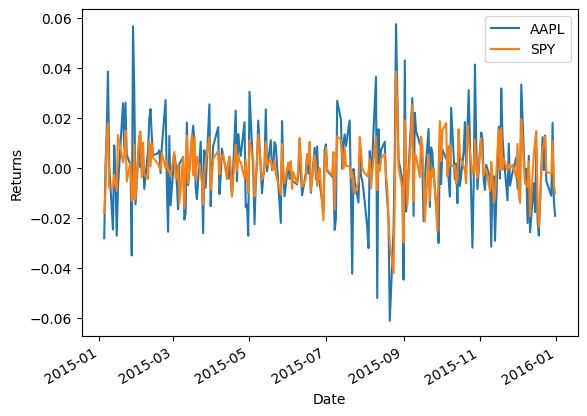

In [12]:
symbol_list = ["SPY", "AAPL"]
start = datetime(2015,1,1)
end = datetime(2016,1,1)
pricing_sample = yf.download(symbol_list, start = start, end = end)['Close']

# Extract stock ticker symbols from column names
new_columns = [col.split()[1] if len(col.split()) > 1 else col for col in pricing_sample.columns]
pricing_sample.columns = new_columns

returns_sample = pricing_sample.pct_change()[1:]
returns_sample.plot()
plt.ylabel('Returns')
plt.show()


While these returns look to have the same mean, we still don't have enough evidence to say for sure. We use a hypothesis test to ground our suspicions in a statistical basis.

When comparing two means, our hypothesis tests are stated as the following:

1. $H_0: \mu_1 - \mu_2 = \theta_0, \ H_A: \mu_1 - \mu_2 \neq \theta_0$
2. $H_0: \mu_1 - \mu_2 \leq \theta_0, \ H_A: \mu_1 - \mu_2 > \theta_0$
3. $H_0: \mu_1 - \mu_2 \geq \theta_0, \ H_A: \mu_1 - \mu_2 < \theta_0$

Where $\mu_1, \mu_2$ are the respective means of SPY and AAPL and $\theta_0$ is the parameter we are testing. We will use the first hypothesis test to test the equality of the two returns. If we assume that the population variances are equal, our test statistic is calculated as:

$$ t = \frac{(\bar{X}_1 - \bar{X}_2) - (\mu_1 - \mu_2)}{(\frac{s_p^2}{n_1} + \frac{s_p^2}{n_2})^{1/2}} = \frac{\bar{X}_1 - \bar{X}_2}{(\frac{s_p^2}{n_1} + \frac{s_p^2}{n_2})^{1/2}}$$

With $s_p^2 = \frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2)}{n_1 + n_2 - 2}$ as the estimator of the common variance, known as the pooled variance, and $n_1 + n_2 - 2$ as the number of degrees of freedom ($n_1 - 1$ and $n_2 - 1$ for each dataset). A typical $t$-test on a mean assumes that all variances involved are equal with underlying normal distributions. If we are assuming that the variances are not equal, we have to calculate our test statistic differently. Our test statistic in this case is:

$$ t = \frac{(\bar{X}_1 - \bar{X}_2) - (\mu_1 - \mu_2)}{(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2})^{1/2}} = \frac{\bar{X}_1 - \bar{X}_2}{(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2})^{1/2}}$$

Where the number of degrees of freedom used to find the critical statistic is the modified degrees of freedom, the number of values that are free to vary, $df = \frac{(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2})^2}{\frac{(s_1^2/n_1)^2}{n_1} + \frac{(s_2^2/n_2)^2}{n_2}}$. This preserves the underlying normality of the data being tested while accounting for differing variances. Calculating the statistic this way removes a lot of problems that can occur if we have unequal variances, especially if the sample sizes of the underlying data differ as well. This specific case of a $t$-test is referred to as ["Welch's unequal variances $t$-test"](https://en.wikipedia.org/wiki/Welch%27s_t-test).

For this example, we are assuming that the variances of SPY and AAPL returns are different. We think that AAPL will be riskier than SPY so we will use the second formulation of the test statistic. Let's say that $\alpha = 0.05$ so we are computing a $95\%$ hypothesis test.

In [13]:
# Sample mean values
mu_spy, mu_aapl = returns_sample.mean()
s_spy, s_aapl = returns_sample.std()
n_spy = len(returns_sample['SPY'])
n_aapl = len(returns_sample['AAPL'])

test_statistic = ((mu_spy - mu_aapl) - 0)/((s_spy**2/n_spy) + (s_aapl**2/n_aapl))**0.5
df = ((s_spy**2/n_spy) + (s_aapl**2/n_aapl))**2/(((s_spy**2 / n_spy)**2 /n_spy)+((s_aapl**2 / n_aapl)**2/n_aapl))

print('t test statistic: ', test_statistic)
print('Degrees of freedom (modified): ', df)

t test statistic:  -0.02215789705697493
Degrees of freedom (modified):  403.9373134571426


Looking at a [t-table](https://en.wikipedia.org/wiki/Student%27s_t-distribution#Table_of_selected_values), we determine that the critical values for our two-sided hypothesis test are $-1.96$ and $1.96$.  Our test statistic is between these values so we **fail to reject** the null hypothesis and determine that the difference between SPY and AAPL returns is **not** significantly different from $0$.

## Hypothesis Testing on Variances

If we want to test the variances of populations, we need to use a different distribution from the $t$ and $z$ distributions. Variances must by definition be greater than (or equal to) $0$ and fact that the distributions we have worked with up until now allow negative values makes them unviable as testing distributions. Risk is quantified in terms of standard deviations and variances so this method of hypothesis testing is a handy addition to our financial toolbox.

Instead of $t$ and $z$-distributions, we will be working with $\chi^2$ distributions for single variance tests and $F$ distributions for comparisons of variance. These distributions are bounded below by $0$, making them viable for testing in this manner.

Just like with all of our other hypothesis tests, tests of a single variance can take on three forms:

1. $H_0: \sigma^2 = \sigma_0^2, \ H_A: \sigma^2 \neq \sigma_0^2$
2. $H_0: \sigma^2 \leq \sigma_0^2, \ H_A: \sigma^2 > \sigma_0^2$
3. $H_0: \sigma^2 \geq \sigma_0^2, \ H_A: \sigma^2 < \sigma_0^2$

The $\chi^2$ distribution is a family of functions with each different formulation determined by the number of degrees of freedom. The shape of the distribution is different for every different value of the number of degrees of freedom, $k$.

In [14]:
from scipy.stats import chi2

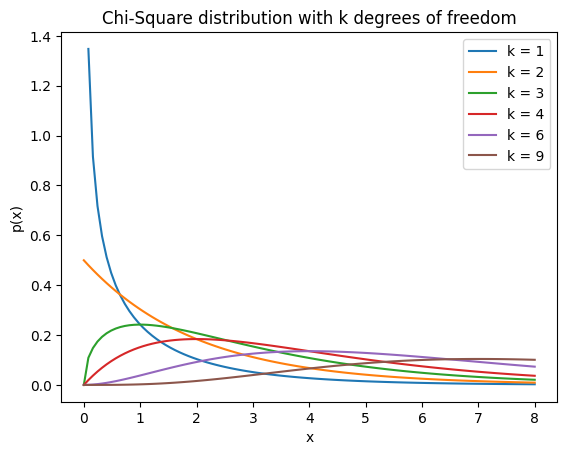

In [15]:
# Here we show what a chi-square looks like
x = np.linspace(0, 8, 100)
y_1 = chi2.pdf(x, 1)
y_2 = chi2.pdf(x, 2)
y_3 = chi2.pdf(x, 3)
y_4 = chi2.pdf(x, 4)
y_6 = chi2.pdf(x, 6)
y_9 = chi2.pdf(x, 9)

fig, ax = plt.subplots()
ax.plot(x, y_1, label = 'k = 1')
ax.plot(x, y_2, label = 'k = 2')
ax.plot(x, y_3, label = 'k = 3')
ax.plot(x, y_4, label = 'k = 4')
ax.plot(x, y_6, label = 'k = 6')
ax.plot(x, y_9, label = 'k = 9')
ax.legend()
plt.title('Chi-Square distribution with k degrees of freedom')
plt.xlabel('x')
plt.ylabel('p(x)');

We calculate the $\chi^2$ test statistic as:

$$ \chi^2 = \frac{(n - 1)s^2}{\sigma_0^2} $$

Where $s^2$ is the sample variance and $n$ is the size of the dataset. The number of degrees of freedom is $n - 1$ and this is used in conjunction with the test statistic to determine the critical value(s) of our $\chi^2$ hypothesis test.

[*********************100%%**********************]  1 of 1 completed


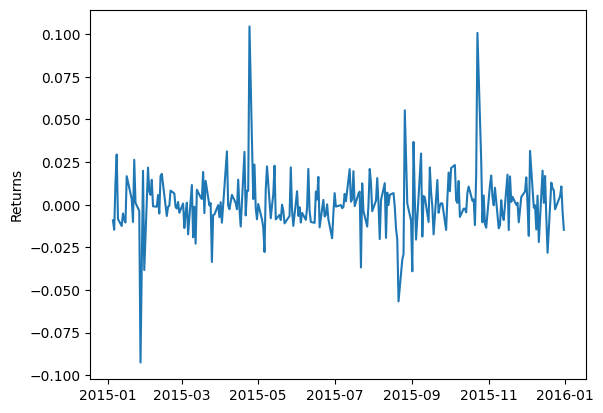

In [16]:
start = datetime(2015,1,1)
end = datetime(2016,1,1)
pricing_sample = yf.download("MSFT", start = start, end = end)['Close']
returns_sample = pricing_sample.pct_change()[1:]
plt.plot(returns_sample.index, returns_sample.values)
plt.ylabel('Returns');

Now we will use a $\chi^2$-test to test the value of the variance of Microsoft stock. Let's say that we want to use $\alpha = 0.01$ to test whether the variance of MSFT is less than or equal to $0.0001$ (that the standard deviation, or risk, is less than or equal to $0.01$).

$$ H_0: \sigma^2 \leq 0.0001, \ H_A: \sigma^2 > 0.0001 $$

So now we calculate our test statistic:

In [17]:
test_statistic = (len(returns_sample) - 1) * returns_sample.std()**2 / 0.0001
print('Chi-square test statistic: ', test_statistic)

Chi-square test statistic:  794.9891044993869


In [18]:
# Here we calculate the critical value directly because our df is too high for most chisquare tables
crit_value = chi2.ppf(0.99, len(returns_sample) - 1)
print('Critical value at a = 0.01 with 251 df: ', crit_value)

Critical value at a = 0.01 with 251 df:  304.9395557339572


Because we are using the 'less than or equal to' formulation of a one-sided hypothesis test, we reject the null hypothesis if our test statistic is greater than the critical value. Since $805.372 > 304.940$, we **reject** the null hypothesis in favor of the alternative and assert that $\sigma^2 > 0.0001$.

### Comparing  Two Variances

We can compare the variances of two separate things using the $F$ distribution. When constructing a comparison of
variances using an $F$-test, the hypothesis formulations are (in case you don't feel like scrolling up):

1. $H_0: \sigma_1^2 = \sigma_2^2, \ H_A: \sigma_1^2 \neq \sigma_2^2$
2. $H_0: \sigma_1^2 \leq \sigma_2^2, \ H_A: \sigma_1^2 > \sigma_2^2$
3. $H_0: \sigma_1^2 \geq \sigma_2^2, \ H_A: \sigma_1^2 < \sigma_2^2$

The $F$ distribution is similar to the $\chi^2$ distribution in that it is asymmetrical and bounded below by $0$. The $F$ distribution is defined with two different values of degrees of freedom. For the purposes of hypothesis testing, each one correlates to one of the factors that we are comparing. An $F$ distribution can be constructed from two separate $\chi^2$ distributions. $X$ is a $F$ random variable if it can be written as $X = \frac{Y_1/d_1}{Y_2/d_2}$, where $Y_1$ and $Y_2$ are $\chi^2$ random variables with degrees of freedom $d_1$ and $d_2$, respectively.

The an $F$ random variable is essentially a ratio of variances. Consequently, constructing the $F$ test statistic is done by taking the ratio of the sample variances of the data that we want to test. We can simply choose $\sigma_1^2$ and $\sigma_2^2$ to represent either of the variances that we are comparing in order so that our F-statistic is greater than $1$.

$$ F = \frac{s_1^2}{s_2^2} $$

Let's compare SPY and AAPL to see whether their variances are the same (a 'not equal to' hypothesis test). We will use a $\alpha = 0.05$ test. Recall that for a two-sided test, we calculate the lower and upper critical values using values of $\alpha/2$. We gather the data and calculate the test statistic.

[*********************100%%**********************]  2 of 2 completed


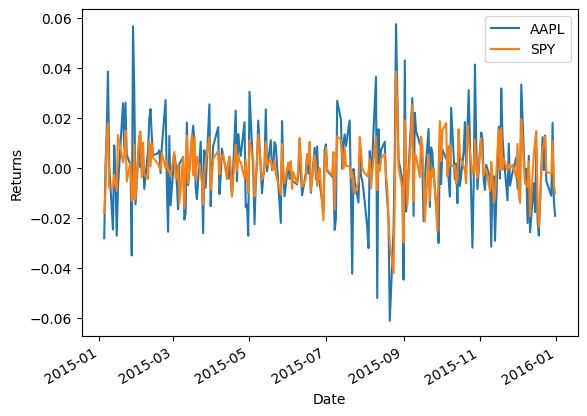

In [19]:
symbol_list = ["SPY", "AAPL"]
start = datetime(2015,1,1)
end = datetime(2016,1,1)
pricing_sample = yf.download(symbol_list, start = start, end = end)['Close']

# Extract stock ticker symbols from column names
new_columns = [col.split()[1] if len(col.split()) > 1 else col for col in pricing_sample.columns]
pricing_sample.columns = new_columns

returns_sample = pricing_sample.pct_change()[1:]
returns_sample.plot()
plt.ylabel('Returns')
plt.show()

In [20]:
# Take returns from above, AAPL and SPY, and compare their variances
spy_std_dev, aapl_std_dev = returns_sample.std()
print('SPY standard deviation is: ', spy_std_dev)
print('AAPL standard deviation is: ', aapl_std_dev)

SPY standard deviation is:  0.016863806494841423
AAPL standard deviation is:  0.009830910506083741


Note that the standard deviation of AAPL is greater than the standard deviation of SPY. As a result we choose $\sigma_1^2$ to represent the variance of AAPL and $\sigma_2^2$ to represent the variance of SPY.

In [21]:
test_statistic = (aapl_std_dev / spy_std_dev)**2
print("F Test statistic: ", test_statistic)

F Test statistic:  0.3398413848169902


In [22]:
# Since these values are taken over the same time period, they will have the same number of degrees of freedom
df1 = len(returns_sample['AAPL']) - 1
df2 = len(returns_sample['SPY']) - 1

print('Degrees of freedom for SPY: ', df2)
print('Degrees of freedom for AAPL: ', df1)

Degrees of freedom for SPY:  250
Degrees of freedom for AAPL:  250


In [23]:
from scipy.stats import f

In [ ]:
upper_crit_value = f.ppf(0.975, df1, df2)
lower_crit_value = f.ppf(0.025, df1, df2)
print('Upper critical value at a = 0.05 with df1 = {0} and df2 = {1}: '.format(df1, df2), upper_crit_value)
print('Lower critical value at a = 0.05 with df1 = {0} and df2 = {1}: '.format(df1, df2), lower_crit_value)

Upper critical value at a = 0.05 with df1 = 250 and df2 = 250:  1.28208064948
Lower critical value at a = 0.05 with df1 = 250 and df2 = 250:  0.779982133263


We see that our F-statistic value is greater than the upper critical value for our F test. Thus we **reject** the null hypothesis in favor of the alternative and conclude that the variances of AAPL and SPY indeed do differ.

## Other Resources
Some of the content featured here is adapted from "Quantitative Investment Analysis", by DeFusco, McLeavey, Pinto, and Runkle.

More common test statistics and tests can be found [here](https://en.wikipedia.org/wiki/Statistical_hypothesis_testing#Common_test_statistics).

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*